In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')
# df.head(10)
#c = df.isnull().sum()
# c.plot(kind='hist', bins=50, figsize = (10,4))
# plt.show()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
# Data cleaning 
# Step1 : drop columns with all NaN's
df.dropna(axis=1, how='all', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [4]:
# Step2 : columns with constant or single values
df_unique = df.loc[:, df.nunique() == 1]
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pymnt_plan                  39717 non-null  object 
 1   initial_list_status         39717 non-null  object 
 2   collections_12_mths_ex_med  39661 non-null  float64
 3   policy_code                 39717 non-null  int64  
 4   application_type            39717 non-null  object 
 5   acc_now_delinq              39717 non-null  int64  
 6   chargeoff_within_12_mths    39661 non-null  float64
 7   delinq_amnt                 39717 non-null  int64  
 8   tax_liens                   39678 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
#Remove the single valued columns
df.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [6]:
# Step3 : Find out the columns that are irrelevant. 
# This can be done by checking how many columns have the least values. 
# In other columns that are having mostly empty values. This can be calculated by printing the columns with isNull().sum
# this provides an idea of columns that are hardly filled. The higher the number, higher the possibility of becoming irrelevant.
# Manually verifying these columns and getting rid of such columns is essential.

# df.shape
# df.info(verbose=True, show_counts=True)
# df.isnull().sum()

#next_pymnt_d -> 38577 out of 39717 instnces of empty values. This can be safely ignored.
#mths_since_last_record -> 36931 out of 3971 instnces of empty values. This can be safely ignored.
#mths_since_last_delinq -> 25682 out of 3971. This column is not useful for reference. Hence can be removed.

#Ignore these columns as they are not much of use 
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [7]:
# Finding the columns that are irrelevant for our study. Following are some of the columns that may not be useful
# 'id'
# 'member_id'
# 'funded_amnt' since funded_amnt_inv provides actual value
# 'url'
# 'title'
# 'desc'
# 'emp_title',
# 'zip_code',
# 'addr_state'
# 'last_credit_pull_d' not relevant
# 'revol_bal': Not required since we have the 'revol_bal_inv'
# 'delinq_2yrs' ==> count = (df['delinq_2yrs'] == 0).sum() ==> 35405 Most of the values are zeros and does not contribute much to the study

df.drop(['id','member_id','funded_amnt','url','title','desc','emp_title','zip_code','addr_state','last_credit_pull_d','revol_bal','delinq_2yrs'], axis = 1, inplace= True)
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [8]:
#Ignoring the loan status of type 'Current' as this cannot be used to derive the 'default' in any case.
df = df[df.loan_status != "Current"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt_inv          38577 non-null  float64
 2   term                     38577 non-null  object 
 3   int_rate                 38577 non-null  object 
 4   installment              38577 non-null  float64
 5   grade                    38577 non-null  object 
 6   sub_grade                38577 non-null  object 
 7   emp_length               37544 non-null  object 
 8   home_ownership           38577 non-null  object 
 9   annual_inc               38577 non-null  float64
 10  verification_status      38577 non-null  object 
 11  issue_d                  38577 non-null  object 
 12  loan_status              38577 non-null  object 
 13  purpose                  38577 non-null  object 
 14  dti                   

In [9]:
# Some of the columns that are substituted by another column values such as 
# out_prncp and out_prncp_inv
# total_pymnt and total_pymnt_inv
# out_prncp_inv and total_pymnt_inv can be considered so that these are against the actual values and hence dropping the other fields
df.drop(['out_prncp','total_pymnt'], axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt_inv          38577 non-null  float64
 2   term                     38577 non-null  object 
 3   int_rate                 38577 non-null  object 
 4   installment              38577 non-null  float64
 5   grade                    38577 non-null  object 
 6   sub_grade                38577 non-null  object 
 7   emp_length               37544 non-null  object 
 8   home_ownership           38577 non-null  object 
 9   annual_inc               38577 non-null  float64
 10  verification_status      38577 non-null  object 
 11  issue_d                  38577 non-null  object 
 12  loan_status              38577 non-null  object 
 13  purpose                  38577 non-null  object 
 14  dti                   

In [10]:
# Step4 : Format the data
# Objective is to find the driving factors behind the application that can potentially become default. One of the
# data point loan_status is something that can be evaluated to check other factors that are driving this.
# The loan_status is highly dependent on int_rate. Intereset rates are captured in percentage so nothing is required.
# Also, the emp_length is something to consider. Looking at this data, it needs some correction. 

# applying value counts to check the occurences to
# group the data on team value.
emp_length_value_counts = df['emp_length'].value_counts()
print(emp_length_value_counts)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64


In [11]:
# "10+ years" can be safely converted to 10 and '< 1 year' can be converted to 0
df['emp_length'] = df['emp_length'].str.replace(r'[^0-9]+', '')
df['emp_length'] = df['emp_length'].fillna(0)
df['emp_length'] = df['emp_length'].astype(int)
df.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,...,0.0,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,...,0.0,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,...,0.0,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,...,0.0,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,...,0.0,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,0.0
6,7000,7000.0,60 months,15.96%,170.08,C,C5,8,RENT,47004.0,...,0.0,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,0.0
7,3000,3000.0,36 months,18.64%,109.43,E,E1,9,RENT,48000.0,...,0.0,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,0.0
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4,OWN,40000.0,...,0.0,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,0.0
9,5375,5350.0,60 months,12.69%,121.45,B,B5,1,RENT,15000.0,...,0.0,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,0.0
10,6500,6500.0,60 months,14.65%,153.45,C,C3,5,OWN,72000.0,...,0.0,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-13,1655.54,0.0


In [12]:
# Split the issue_d into date and year separately
df_month_year_split = df['issue_d'].str.partition("-", True)
df['issue_month'] = df_month_year_split[0]
df['issue_year'] = '20' + df_month_year_split[2]


<Axes: >

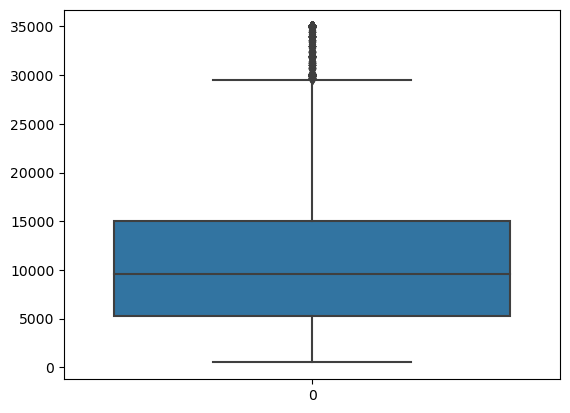

In [13]:
# Step5 : Find the outliers
#term is also important that provides info about the defaulters who may have more loan tenure or less from the past hostory
# it has only two values are good with this data.
#grade, sub_grade,home_ownership, verification_status, issue_d, purpose are object fields and they look good.

# let's analyze int and float values for outliers
# loan_amnt_value_counts = df['loan_amnt'].value_counts()
# loan_amnt_value_counts.describe()
sb.boxplot(df['loan_amnt'])
#The data looks disperesed but even the outliers have so many values and are falling in the some continous bucket
#Hence not removing the outlier for laon_amnt

<Axes: >

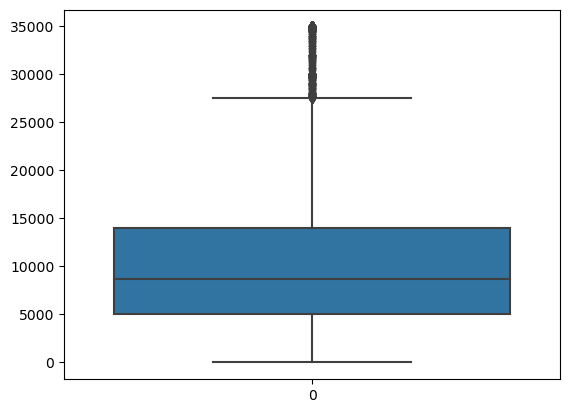

In [14]:
sb.boxplot(df['funded_amnt_inv'])
#The data looks disperesed but even the outliers have so many values and are falling in the some continous bucket
#Hence not removing the outlier for funded_amnt_inv

<Axes: >

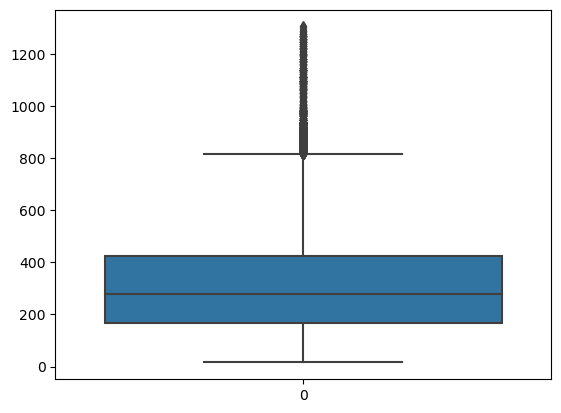

In [15]:
sb.boxplot(df['installment'])
#The data looks disperesed but even the outliers have so many values and are falling in the some continous bucket
#Hence not removing the outlier for installment

<Axes: >

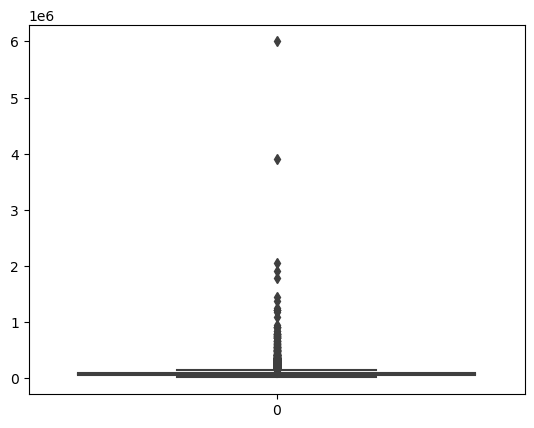

In [16]:
sb.boxplot(df['annual_inc'])
#Annual_inc has some of the value that are very high.

In [17]:
quantile_info = df.annual_inc.quantile([0.05,0.10,0.25,0.5,0.75,0.90,0.95, 0.97,0.98, 0.99])
quantile_info

0.05     24000.0
0.10     30000.0
0.25     40000.0
0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

<Axes: >

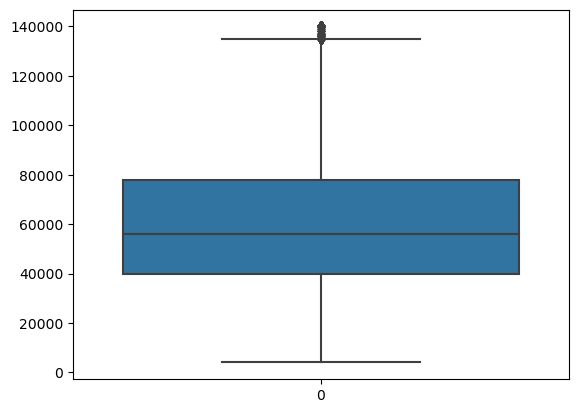

In [18]:
# Based on above results, above 0.95 can be ignored
annual_inc_95 = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= annual_inc_95]
sb.boxplot(df.annual_inc)
#data looks good now

[Text(0.5, 0, '')]

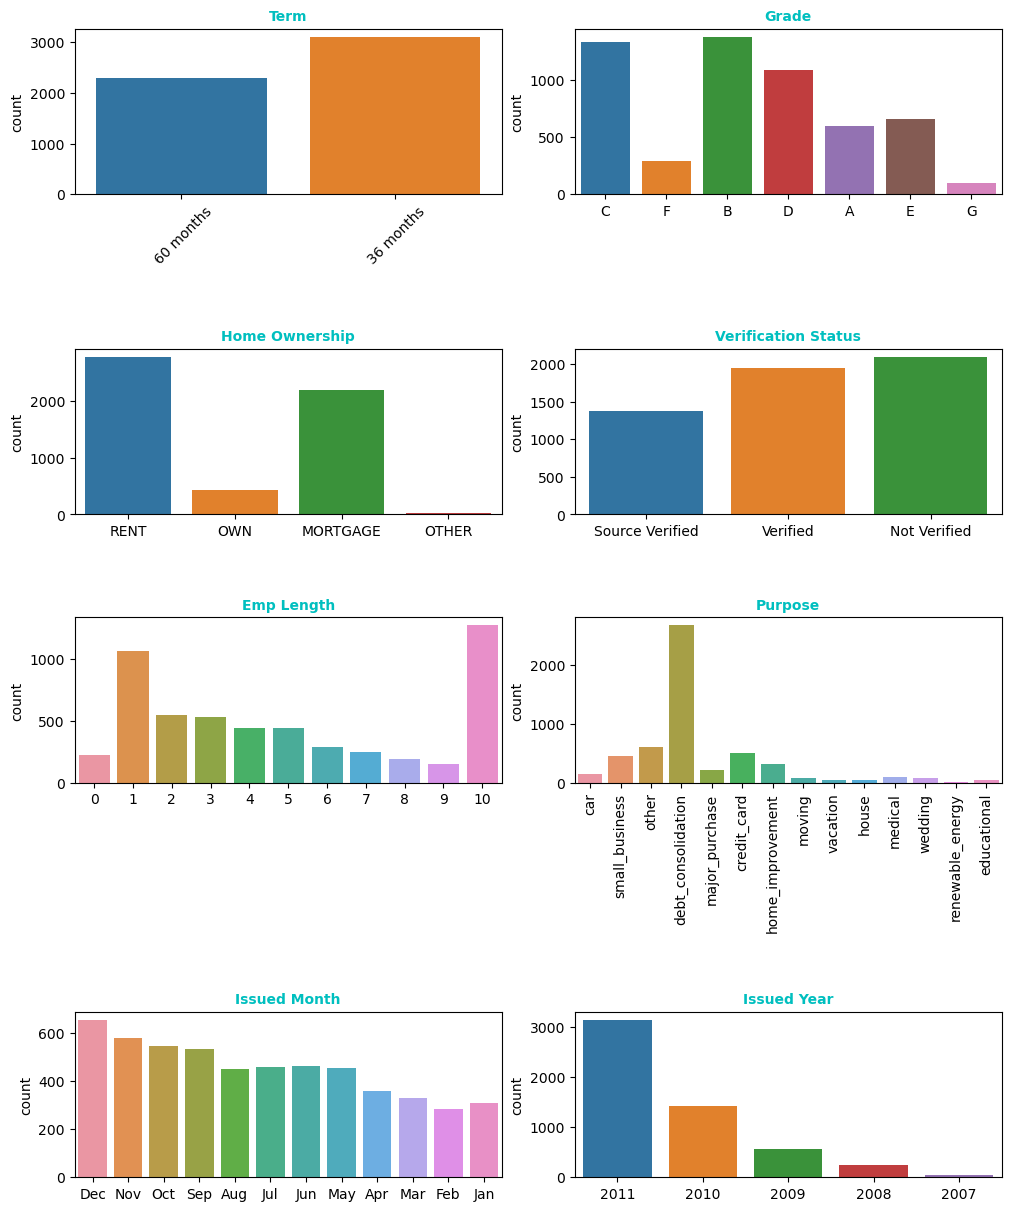

In [30]:
# Univariate Analysis
# Univariate analysis can be done for the term, grade, sub-grade, home_ownership , etc
# Univariate Analysis 1: Analyze how the term can influence the loan_status
fig, ax = plt.subplots(4,2,constrained_layout=True,figsize = (10,12), gridspec_kw={'hspace': 0.2, 'wspace': 0})
# plt.xlabel("sepal_length", fontsize=20)
# plt.ylabel("petal_length", fontsize=20)
chart_term = sb.countplot(x='term', data=df[df['loan_status']=='Charged Off'], ax=ax[0,0])
chart_term.set_xticklabels(chart_term.get_xticklabels(), rotation=45)
chart_term.set_title('Term',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_term.set(xlabel=None)

chart_grade = sb.countplot(x='grade', data=df[df['loan_status']=='Charged Off'], ax=ax[0,1])
chart_grade.set_title('Grade',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_grade.set(xlabel=None)

chart_home_ownership = sb.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'],ax=ax[1,0])
chart_home_ownership.set_title('Home Ownership',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_home_ownership.set(xlabel=None)

chart_verification_status = sb.countplot(x='verification_status', data=df[df.loan_status == 'Charged Off'], ax=ax[1,1])
chart_verification_status.set_title('Verification Status',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_verification_status.set(xlabel=None)

chart_emp_length = sb.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'], ax=ax[2,0])
chart_emp_length.set_title('Emp Length',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_emp_length.set(xlabel=None)

chart_purpose = sb.countplot(x='purpose', data=df[df.loan_status == 'Charged Off'], ax=ax[2,1])
chart_purpose.set_xticklabels(chart_purpose.get_xticklabels(), rotation=90)
chart_purpose.set_title('Purpose',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_purpose.set(xlabel=None)

chart_issue_month = sb.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'], ax=ax[3,0])
chart_issue_month.set_title('Issued Month',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_issue_month.set(xlabel=None)

chart_issue_year = sb.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'], ax=ax[3,1])
chart_issue_year.set_title('Issued Year',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_issue_year.set(xlabel=None)

In [35]:
#Segmented Univariate Analysis

# there re couple of variables that have to be bucketed/grouped so that the analysis can be carried out.
# int_rate, open_acc, revol_util, total_acc, annual_inc, total_recv_principle

df['int_rate'] = pd.to_numeric( df['int_rate'].astype(str).apply(lambda x : x.split('%')[0]))
df['revol_util'] = df['revol_util'].fillna(0)
df['revol_util'] = pd.to_numeric( df['revol_util'].astype(str).apply(lambda x : x.split('%')[0]))
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','10%-14%','15%-19%','20%-24%','25%-29%'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['1-10','11-20','21-30','31-40','41-50'])
df['revol_util_groups'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
# loan_amt -> 500-35k range
# dti -> 0-30 range
# funded_amnt_inv -> 4k-35K
# installment -> 15-1300
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['funded_amnt_inv_groups'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

[Text(0.5, 0, '')]

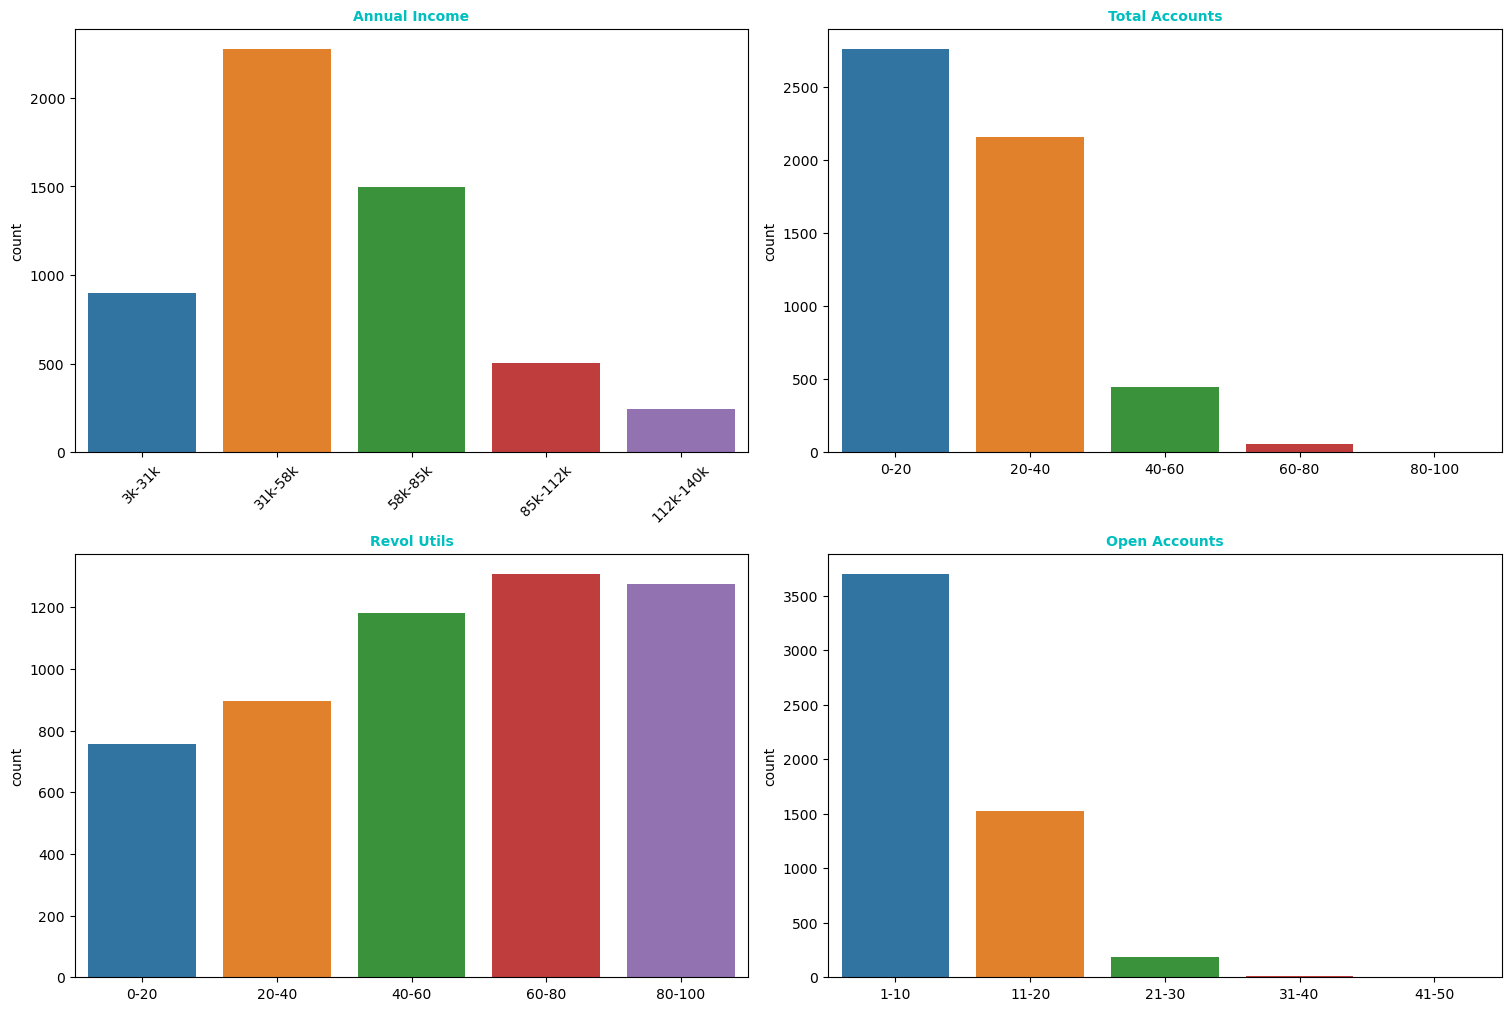

In [21]:
fig, ax = plt.subplots(2,2,constrained_layout=True,figsize = (15,10))
chart_acc_groups = sb.countplot(x='annual_inc_groups', data=df[df.loan_status == 'Charged Off'], ax=ax[0,0])
chart_acc_groups.set_xticklabels(chart_acc_groups.get_xticklabels(), rotation=45)
chart_acc_groups.set_title('Annual Income',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_acc_groups.set(xlabel=None)

chart_total_acc_groups = sb.countplot(x='total_acc_groups', data=df[df.loan_status == 'Charged Off'], ax=ax[0,1])
chart_total_acc_groups.set_title('Total Accounts',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_total_acc_groups.set(xlabel=None)

chart_revol_util_groups = sb.countplot(x='revol_util_groups', data=df[df.loan_status == 'Charged Off'],ax=ax[1,0])
chart_revol_util_groups.set_title('Revol Utils',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_revol_util_groups.set(xlabel=None)

chart_open_acc_groups = sb.countplot(x='open_acc_groups', data=df[df.loan_status == 'Charged Off'], ax=ax[1,1])
chart_open_acc_groups.set_title('Open Accounts',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_open_acc_groups.set(xlabel=None)

[Text(0, 0, '5%-9%'),
 Text(1, 0, '10%-14%'),
 Text(2, 0, '15%-19%'),
 Text(3, 0, '20%-24%'),
 Text(4, 0, '25%-29%')]

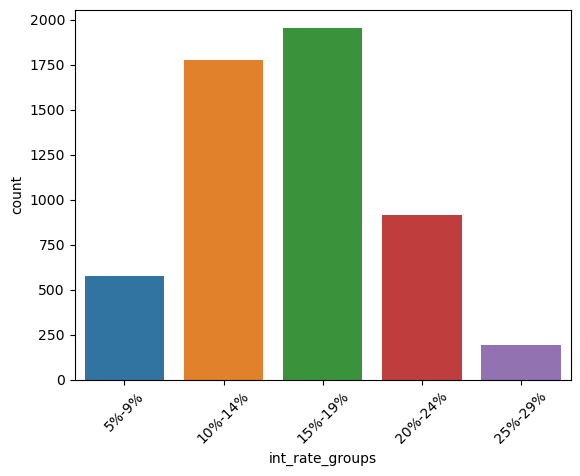

In [22]:
int_rate_groups_chart = sb.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
int_rate_groups_chart.set_xticklabels(int_rate_groups_chart.get_xticklabels(), rotation=45)

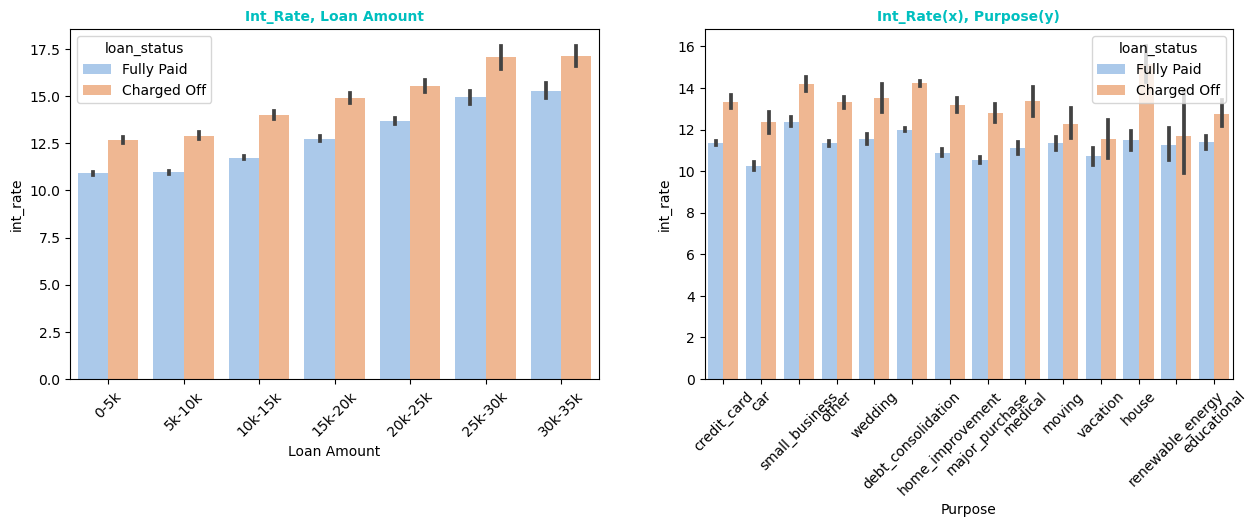

In [61]:
#BiVariate Univariate Analysis


#Analyze int_rate vs loan_amount    
#Analyze int_rate vs purpose 
plt.figure(figsize=(15,10))
plt.subplot(221)
chart_loan_amnt_int_rate = sb.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
chart_loan_amnt_int_rate.set_xticklabels(chart_loan_amnt_int_rate.get_xticklabels(), rotation=45)
chart_loan_amnt_int_rate.set_title('Int_Rate, Loan Amount',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_loan_amnt_int_rate.set(xlabel="Loan Amount")
# chart_loan_amnt_int_rate.set(ylabel=None)

plt.subplot(222)
chart_purpose_int_rate =sb.barplot(data =df,x='purpose', y='int_rate', hue ='loan_status',palette="pastel")
chart_purpose_int_rate.set_xticklabels(chart_purpose_int_rate.get_xticklabels(), rotation=45)
chart_purpose_int_rate.set_title('Int_Rate, Purpose',color='c', fontdict={'size': 10,'fontweight':'bold'})
chart_purpose_int_rate.set(xlabel="Purpose")
plt.show()


#Observation- Loan amount of 30-35K having interest rate of 15-17.5%
#Observation - interest rate of 12-16% for house, debt_consolidtion purpose

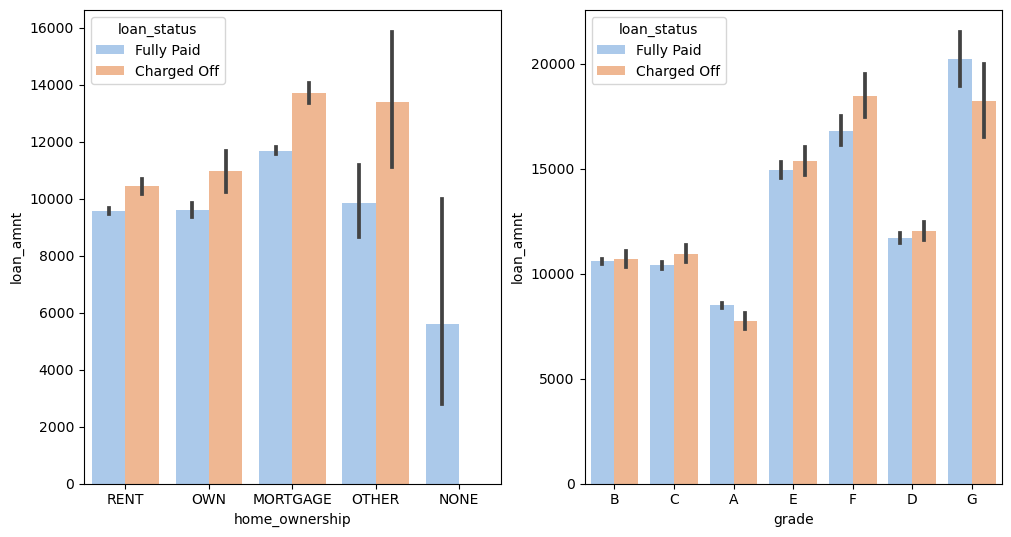

In [62]:
#Analyze loan_amount vs home_ownership   
#Analyze loan_amount vs Grade  
plt.figure(constrained_layout=True,figsize=(10,10))
plt.subplot(221)
sb.barplot(data =df,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.subplot(222)
sb.barplot(data =df,x='grade', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()
#Observation - loan amount of 10-14k and MORTGAGE

#Observation - loan amount of 15-20k and grade 'G'

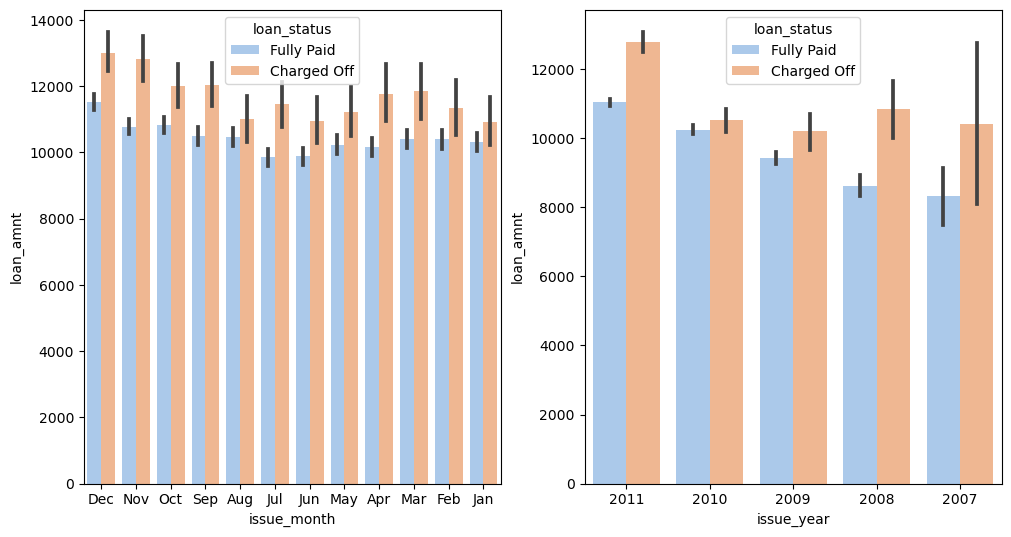

In [63]:
#Analyze loan_amount vs issue_d   
plt.figure(constrained_layout=True,figsize=(10,10))
plt.subplot(221)
sb.barplot(data =df,x='issue_month', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.subplot(222)
sb.barplot(data =df,x='issue_year', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()
#Observation - loan issued in Dec month and in the year 2011

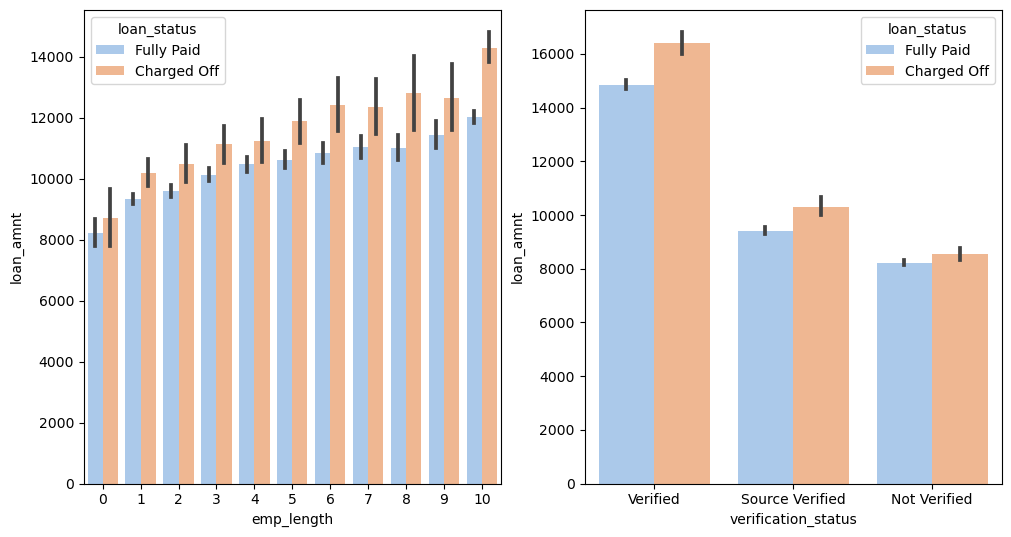

In [64]:
#Analyze loan_amount vs emp_length
#Analyze loan_amount vs verification_status
plt.figure(constrained_layout=True,figsize=(10,10))
plt.subplot(221)
sb.barplot(data =df,x='emp_length', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.subplot(222)
sb.barplot(data =df,x='verification_status', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()
#Observation - loan with employment length is 10 years and loan amount is 12-14k
#Observation - loan with verification status verified and loan amount is above 15K